<a href="https://colab.research.google.com/github/DoyulPark/pdm08/blob/master/py-tensorflow/tf2_8_cifar10_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of cifar-10 dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: Find the best model
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

### CIFAR-10 Dataset (CIFAR: Canadian Institute For Advanced Research)
> https://www.cs.toronto.edu/~kriz/cifar.html

- (50000, 32, 32, 3), train
- (10000, 32, 32, 3), test
- color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc
> class names
> - ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

- 참고 문헌  

> https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8  

> https://becominghuman.ai/convolutional-neural-networks-cnns-convnets-for-visual-recognition-cae879a70f1a

> https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [2]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [4]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization reshape를 안하고 normalize를 한다. mnist는 흑백이기 때문에 칼라채널이1인데 4차원으로 구성되어있지않았는데 cifar10은 이미 4차원 구조로 구성되어있다
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [5]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [6]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

9314


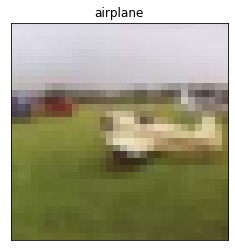

In [7]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

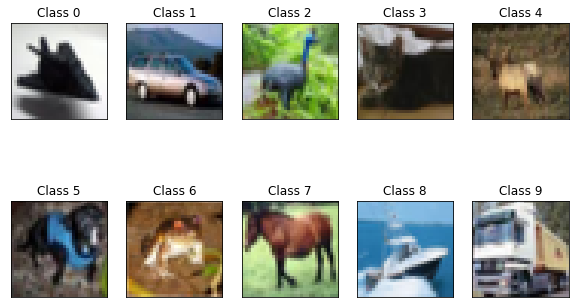

In [8]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1] #np.unique로 사진을 찾는다, y_train0는 무슨인코딩하기전 ,[1]두번째항목선택
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [10]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',   #최적화 함수는 adam함수
              loss='categorical_crossentropy',  #손실함수는(3가지이상의 함수) categorical_crossentropy
              metrics=['accuracy']) 

In [12]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [13]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50 (50은 시간이 너무 많이 걸림)

In [14]:
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5105 - accuracy: 0.4545 - val_loss: 1.2491 - val_accuracy: 0.5635
Epoch 2/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1787 - accuracy: 0.5844 - val_loss: 1.0512 - val_accuracy: 0.6312
Epoch 3/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0501 - accuracy: 0.6294 - val_loss: 0.9752 - val_accuracy: 0.6583
Epoch 4/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9657 - accuracy: 0.6599 - val_loss: 0.9324 - val_accuracy: 0.6686
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9011 - accuracy: 0.6818 - val_loss: 0.8748 - val_accuracy: 0.6924
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8419 - accuracy: 0.7015 - val_loss: 0.8706 - val_accuracy: 0.6976
Epoch 7/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7869 - accuracy: 0.7215 - val_loss: 0.8581 - val_ac

In [15]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 1.7083 - accuracy: 0.6951


[1.7083415985107422, 0.6951000094413757]

## **CNN2 + FCN3**

In [16]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  #layer가 하나 추가됨
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
c2f3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [18]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [19]:
c2f3.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5767 - accuracy: 0.4261 - val_loss: 1.2082 - val_accuracy: 0.5735
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2287 - accuracy: 0.5654 - val_loss: 1.1015 - val_accuracy: 0.6099
Epoch 3/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0820 - accuracy: 0.6227 - val_loss: 0.9857 - val_accuracy: 0.6594
Epoch 4/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9879 - accuracy: 0.6560 - val_loss: 0.9387 - val_accuracy: 0.6733
Epoch 5/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9218 - accuracy: 0.6784 - val_loss: 0.8999 - val_accuracy: 0.6867
Epoch 6/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8573 - accuracy: 0.7019 - val_loss: 0.9000 - val_accuracy: 0.6878
Epoch 7/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8108 - accuracy: 0.7179 - val_loss: 0.8858 - val_ac

In [20]:
 c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 1.3904 - accuracy: 0.7088


[1.3903965950012207, 0.7088000178337097]

# **[DIY] Hidden layer에 따른 정확도**

In [21]:
score1=c2f2.evaluate(X_test, y_test, batch_size = 32)
score2=c2f3.evaluate(X_test, y_test, batch_size = 32)
losses = [score1[0],score2[0]]
accuracies= [score1[1],score2[1]]
losses,accuracies

313/313 [==============================] - 1s 2ms/step - loss: 1.3904 - accuracy: 0.7088


([1.7083415985107422, 1.3903965950012207],
 [0.6951000094413757, 0.7088000178337097])

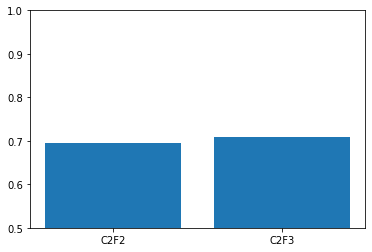

In [22]:
x = np.arange(2)
cnns = ['C2F2','C2F3']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.5,1.0))
plt.show()

## Complex model
- C4F5 model

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

In [23]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),   #5단짜리 dense를 만들어준다
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [24]:
c4f5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)        

In [25]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [26]:
c4f5.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6781 - accuracy: 0.3602 - val_loss: 1.3215 - val_accuracy: 0.5094
Epoch 2/500
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2450 - accuracy: 0.5580 - val_loss: 1.1000 - val_accuracy: 0.6036
Epoch 3/500
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0487 - accuracy: 0.6356 - val_loss: 1.0295 - val_accuracy: 0.6509
Epoch 4/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9251 - accuracy: 0.6831 - val_loss: 0.9859 - val_accuracy: 0.6564
Epoch 5/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8327 - accuracy: 0.7185 - val_loss: 0.9141 - val_accuracy: 0.6850
Epoch 6/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7526 - accuracy: 0.7472 - val_loss: 0.9058 - val_accuracy: 0.7063
Epoch 7/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6983 - accuracy: 0.7667 - val_loss: 0.8754 - val_a

In [28]:
 c4f5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 1.3247 - accuracy: 0.7408


[1.324691653251648, 0.7408000230789185]

## Graph of loss and accuracy
- model: C4f5

In [29]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
epoch = 39
hist = c4f5.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/39
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6723 - accuracy: 0.3625 - val_loss: 1.3634 - val_accuracy: 0.4905
Epoch 2/39
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2480 - accuracy: 0.5553 - val_loss: 1.0908 - val_accuracy: 0.6187
Epoch 3/39
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0491 - accuracy: 0.6389 - val_loss: 1.0507 - val_accuracy: 0.6392
Epoch 4/39
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9241 - accuracy: 0.6837 - val_loss: 0.9781 - val_accuracy: 0.6652
Epoch 5/39
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8471 - accuracy: 0.7128 - val_loss: 0.9621 - val_accuracy: 0.6724
Epoch 6/39
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7729 - accuracy: 0.7390 - val_loss: 0.8622 - val_accuracy: 0.7116
Epoch 7/39
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7072 - accuracy: 0.7642 - val_loss: 0.9054 - val_accuracy:

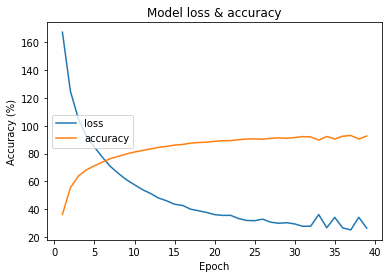

In [31]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [32]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

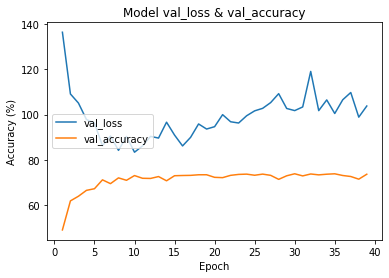

In [33]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

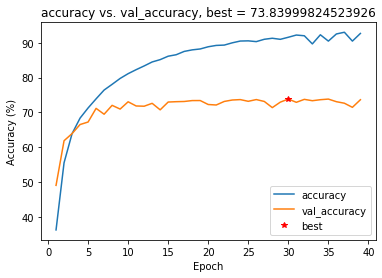

In [34]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')


## cifar10 모델 학습
> https://gruuuuu.github.io/machine-learning/cifar10-cnn/#

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [35]:
# c2f2.save('fmnist_cnn_best.hdf5')

In [36]:
from keras.models import load_model

model = load_model('cifar10_c4f5_best_weights.059-0.7457.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 1.2208 - accuracy: 0.7457


[1.2208255529403687, 0.7457000017166138]

## Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [38]:
predictions = model.predict(X_test)

In [39]:
predictions.shape

(10000, 10)

In [40]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [41]:
cm = confusion_matrix(y_test0, predictions0)

In [42]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

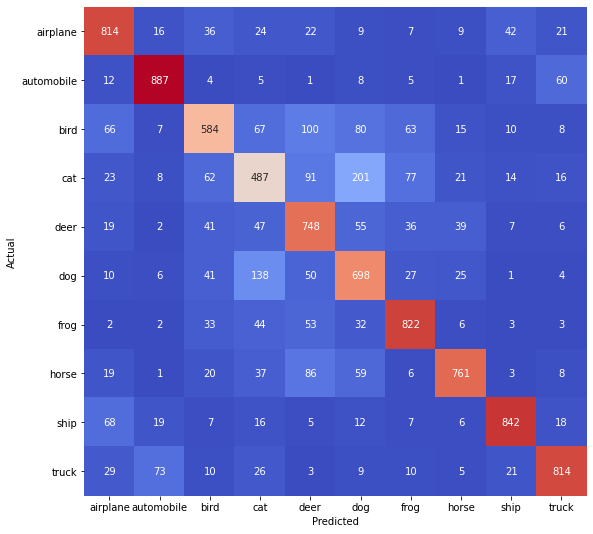

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# State of current scores of cifar-10

> https://paperswithcode.com/sota/image-classification-on-cifar-10

## Transfer learning on cifar-10

- https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245

- https://medium.com/swlh/comparative-analysis-of-cifar-10-image-classification-transfer-learning-vs-user-defined-cnns-e673685d925e

- https://medium.com/swlh/hands-on-the-cifar-10-dataset-with-transfer-learning-2e768fd6c318

- https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f